# Import Libraries

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Import DataSet

In [16]:
fraud=pd.read_csv('Fraud_check.csv')

# Data Understanding With Data Preprocessing

In [17]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [18]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [19]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [20]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"MaritalStatus","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [21]:
le=LabelEncoder()


In [22]:
fraud['undergrad']=le.fit_transform(fraud.undergrad)
fraud['MaritalStatus']=le.fit_transform(fraud.MaritalStatus)
fraud['urban']=le.fit_transform(fraud.urban)

In [23]:
fraud

,undergrad,MaritalStatus,population,experience,urban,income
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


# Data Visualization

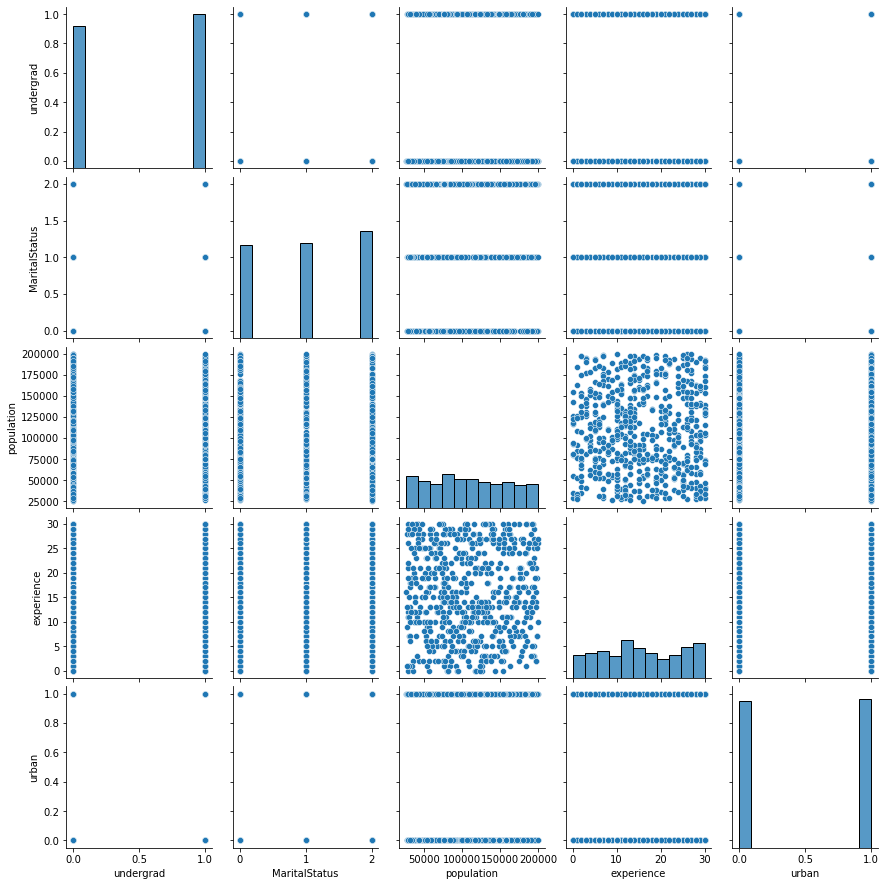

In [32]:
sns.pairplot(fraud)

# Model Building

In [25]:
x=fraud.drop(['income'],axis=1)
y=fraud.income

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state=7)

In [29]:
dt_model=DecisionTreeClassifier(criterion = "entropy",max_depth=5)

# Model Training

In [30]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Model Testing

In [52]:
y_train_pred=dt_model.predict(x_train)

In [53]:
y_test_pred=dt_model.predict(x_test)

In [54]:
print(accuracy_score(y_train,y_train_pred))

0.8083333333333333


In [55]:
print(accuracy_score(y_test,y_test_pred))

0.7666666666666667


In [56]:
print(confusion_matrix(y_train,y_train_pred))

[[381   0]
 [ 92   7]]


In [57]:
print(confusion_matrix(y_test,y_test_pred))

[[91  4]
 [24  1]]
